In [2]:
# Consider the binomial random walk model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

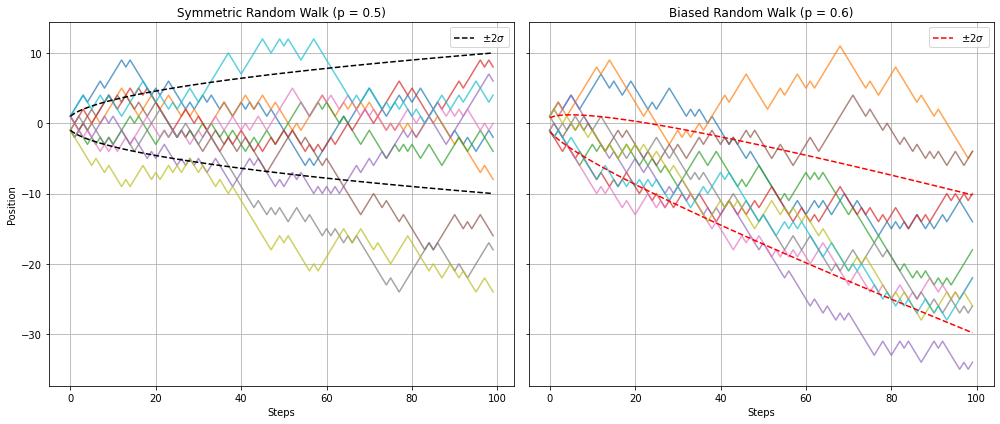

In [17]:
import numpy as np
import matplotlib.pyplot as plt
T = 100
n_paths = 10

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Symmetric Random Walk (p = 0.5) ---
p1 = 0.5
mu1 = 1 - 2 * p1
sigma1 = lambda n: 2 * np.sqrt(n * p1 * (1 - p1))
n_vals = np.arange(1, T + 1)
mean1 = mu1 * n_vals

for _ in range(n_paths):
    steps = np.where(np.random.binomial(1, p1, T) == 0, 1, -1)
    axs[0].plot(np.cumsum(steps), alpha=0.7)

axs[0].plot(mean1 + sigma1(n_vals), 'k--', label=r'$\pm 2\sigma$')
axs[0].plot(mean1 - sigma1(n_vals), 'k--')
axs[0].set_title("Symmetric Random Walk (p = 0.5)")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Position")
axs[0].legend()
axs[0].grid(True)

# --- Biased Random Walk (p = 0.6) ---
p2 = 0.6
mu2 = 1 - 2 * p2
sigma2 = lambda n: 2 * np.sqrt(n * p2 * (1 - p2))
mean2 = mu2 * n_vals

for _ in range(n_paths):
    steps = np.where(np.random.binomial(1, p2, T) == 0, 1, -1)
    axs[1].plot(np.cumsum(steps), alpha=0.7)

axs[1].plot(mean2 + sigma2(n_vals), 'r--', label=r'$\pm 2\sigma$')
axs[1].plot(mean2 - sigma2(n_vals), 'r--')
axs[1].set_title("Biased Random Walk (p = 0.6)")
axs[1].set_xlabel("Steps")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


### The Generalized Binomial Process

Let $b_t = a + n \cdot u - m \cdot d$, where $n$ is the number of up moves, $m$ is the number of down moves, and $a$ is the starting point.

We assume $n + m = t$.

The expected value of the position after $t$ steps is:

$$
\mathbb{E}[X_t] = t (2p - 1), \quad \text{where } p \in (0,1)
$$

Alternatively, if the up move is of size $u$ and the down move is of size $-d$, the expected value becomes:

$$
\mathbb{E}[X_t] = \mathbb{E}[X_0] + t \cdot \left[ (u + d)p - d \right]
$$

---

**Example:**

If $p = 0.4$, $u = 1$, $d = 1$, and $X_0 = 0$, then:

Using the first formula:

$$
\mathbb{E}[X_{10}] = 10 \cdot (2 \cdot 0.4 - 1) = 10 \cdot (-0.2) = -2
$$

Using the second formula:

$$
\mathbb{E}[X_{10}] = 0 + 10 \cdot \left[ (1 + 1)\cdot 0.4 - 1 \right] = 10 \cdot (0.8 - 1) = 10 \cdot (-0.2) = -2
$$

By linearity of expectation and independence of steps, the variance of $X_t$ grows linearly with $t$:

$$
\mathrm{Var}(X_t) = t \cdot \mathrm{Var}(X_1)
$$

For the simple case where $X_1 \in \{+1, -1\}$ with $\mathbb{P}(+1) = 1 - p$ and $\mathbb{P}(-1) = p$, we have:

$$
\mathrm{Var}(X_1) = 1 - (1 - 2p)^2 = 4p(1 - p)
$$

So:

$$
\mathrm{Var}(X_t) = 4tp(1 - p)
$$


Equivalently, in the more general case where the up move is of size $u$ and the down move is of size $-d$:

$$
\mathrm{Var}(X_t) = t(u + d)^2 p(1 - p)
$$




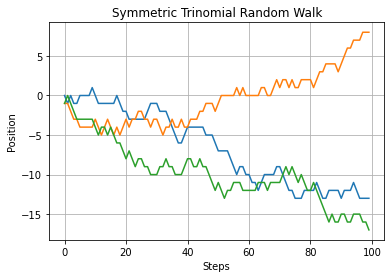

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define probabilities
p_minus = 0.25
p_zero = 0.5
p_plus = 0.25  # so total = 1

# Cumulative thresholds
cut1 = p_minus
cut2 = p_minus + p_zero

# Sample size
n = 100


for i in range(3):

    # Uniform draw
    u = np.random.rand(n)

    # Map to outcomes
    samples = np.where(u < cut1, -1, np.where(u < cut2, 0, 1))

# Plot cumulative sum (random walk)
    plt.plot(np.cumsum(samples))
plt.title("Symmetric Trinomial Random Walk")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.grid(True)
plt.show()
